In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Project fashion Recommender/Final Model.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import numpy as np
import pickle
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from numpy.linalg import norm
from sklearn.neighbors import NearestNeighbors

In [4]:
feature_list = np.array(pickle.load(open('/content/feature_lists.pkl','rb')))

In [5]:
filenames = pickle.load(open('/content/filenames.pkl','rb'))

In [6]:
model = ResNet50(weights = 'imagenet',include_top = False,input_shape = (224,224,3))

In [7]:
model.trainable = False

In [8]:
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [12]:
img = image.load_img('/content/drive/MyDrive/Project fashion Recommender/Sample Test/1941.jpg',target_size = (224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array,axis = 0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)

1/1 [==============================] - 0s 360ms/step


In [13]:
print(len(normalized_result))

2048


In [14]:
neighbors = NearestNeighbors(n_neighbors = 5,algorithm='brute',metric = 'euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [15]:
distances,indices = neighbors.kneighbors([normalized_result])

In [16]:
print(indices)

[[ 3401 43829 23578 43148 30261]]


In [17]:
for file in indices[0]:
  print(filenames[file])

/content/1st/1941.jpg
/content/6th/57230.jpg
/content/4th/37415.jpg
/content/6th/54036.jpg
/content/4th/37423.jpg


In [19]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [20]:
# for file in indices[0]:
#   temp_img = cv2.imread(filenames[file])
#   cv2_imshow(temp_img)

In [21]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Project fashion Recommender/New Images.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

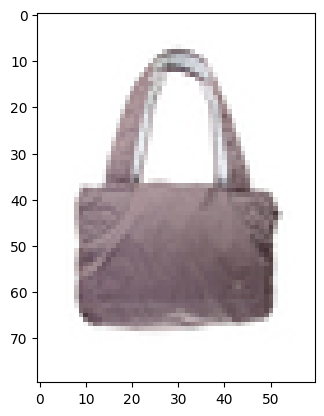

In [22]:
img_res = mpimg.imread('/content/1st/1941.jpg')
img_res_plot = plt.imshow(img_res)
plt.show()

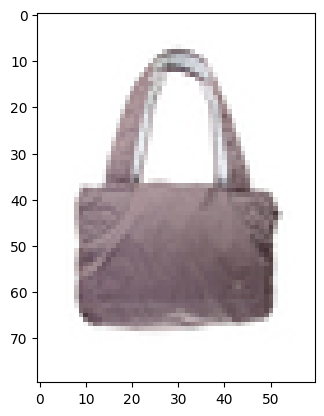

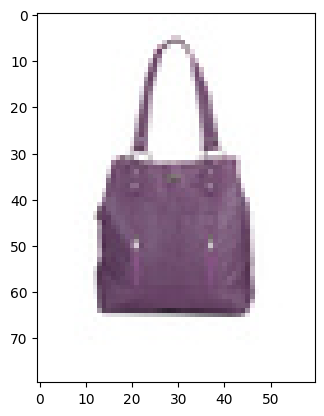

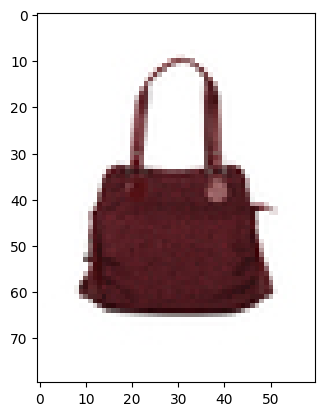

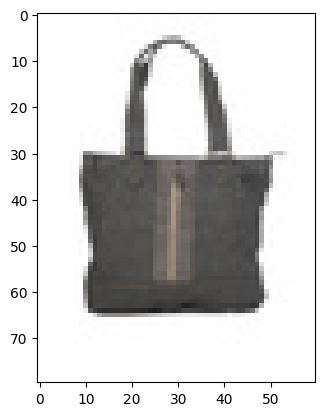

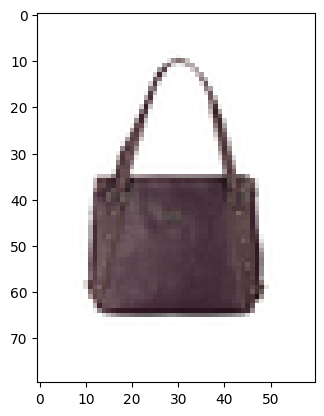

In [23]:
for file in indices[0]:
  img_res = mpimg.imread(filenames[file])
  img_res_plot = plt.imshow(img_res)
  plt.show()